In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv("Mall_Customers.csv") ## reading the file
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
## Target variable is Spending Score (1-100) which is Continuous data. Here we will do Clustering

## Basic Checks

In [4]:
data_new=data.rename(columns={'Genre': 'Gender','Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'SpendingScore'})
data_new

,CustomerID,Gender,Age,Annual_Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data_new.head()

,CustomerID,Gender,Age,Annual_Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data_new.tail()

,CustomerID,Gender,Age,Annual_Income,SpendingScore
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Annual_Income  200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Statistical information of the dataset
data_new.describe()

,CustomerID,Age,Annual_Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data_new.CustomerID.unique() ## this column has unique features, so we dropped this column 

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
data_new1= data_new.drop(['CustomerID'],axis=1)
data_new1.head()

,Gender,Age,Annual_Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
data_new1.shape

(200, 4)

In [12]:
data_new1.SpendingScore.value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: SpendingScore, Length: 84, dtype: int64

In [13]:
data_new1.isnull().sum()

## there is no null values

Gender           0
Age              0
Annual_Income    0
SpendingScore    0
dtype: int64

In [14]:
##!pip install sweetviz

In [15]:
#!pip install sweetviz   ##--Automated Library for visualization

import sweetviz as sv #  library for univariant analysis
my_report = sv.analyze(data_new1)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:>

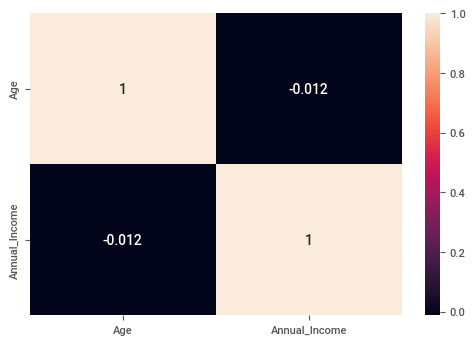

In [16]:
cor=data_new1.corr()
sns.heatmap(data_new1.drop('SpendingScore',axis=1).corr(),annot=True)

## No features are highly correlated, so we will take all features for our analysis.

<AxesSubplot:>

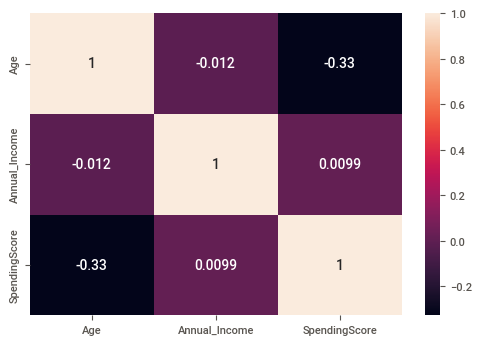

In [17]:
cor=data_new1.corr()
sns.heatmap(data_new1.corr(),annot=True)

## No features are highly correlated, so we will take all features for our analysis.

In [18]:
# Since clustering is an Unsupervised learning, we need only the input variables
X= data_new1.iloc[:,1:-1]
X.head()

,Age,Annual_Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [19]:
## here Scaling is not required as dataset is in same range 

## Building the model

In [20]:
## Determine K using elbow method

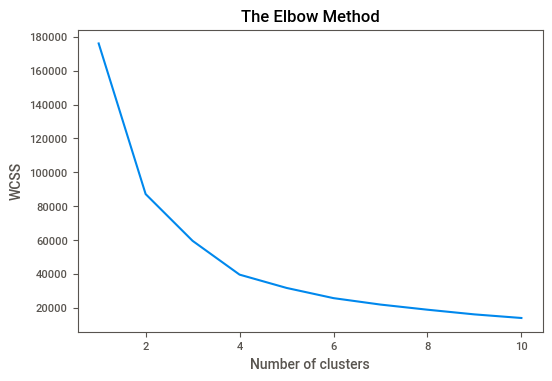

In [21]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Graph gives two value of K, that is 2 and 4..but we will use K=4 as it is more accurate value in the graph.

In [22]:
# Initialise the model with K as 4
model = KMeans(n_clusters=4, random_state=10)

In [23]:
#Training the model
model.fit(X)

KMeans(n_clusters=4, random_state=10)

In [24]:
# labels of the clusters
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [25]:
# centroids of the clusters
model.cluster_centers_

array([[ 55.81481481,  51.77777778],
       [ 39.        , 106.5       ],
       [ 30.34693878,  29.26530612],
       [ 31.95890411,  72.95890411]])

In [26]:
# Set colours to the clusters to differentiate
color_scheme = np.array(['red','blue','green','yellow'])

In [27]:
color_scheme[1]

'blue'

In [28]:
# Visualize the clusters in the original data
plt.scatter(data_new1.Age,data_new1.Annual_Income,color=color_scheme[data_new1.SpendingScore])

IndexError: index 39 is out of bounds for axis 0 with size 4

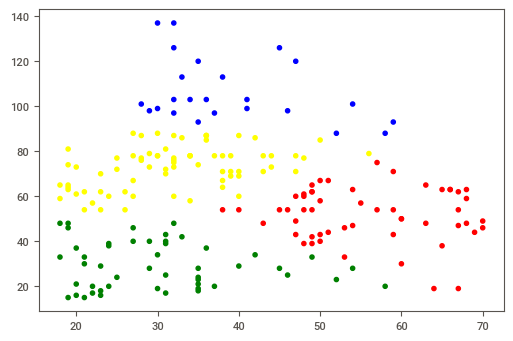

In [29]:
# visualize the clusters formed by the model
plt.scatter(X.Age,X.Annual_Income,color=color_scheme[model.labels_]);

In [31]:
# print dataset with the label
X['label']= pd.DataFrame(model.labels_)
X.head()

,Age,Annual_Income,label
0,19,15,2
1,21,15,2
2,20,16,2
3,23,16,2
4,31,17,2


## Evaluation Metrics:

In [32]:
label=model.labels_
label

from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score

0.43506772949958067

The range of Silhouette score is [-1 to 1]. Its analysis is as follows −

+1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

## Insights:

#### Here Silhouette Score is 0.435 that is near to 0
#### This indicates that many data points are missclassified
#### This indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

## Try with K =2

In [36]:
# Initialise the model with K as 2
model1 = KMeans(n_clusters=2, random_state=10)

In [34]:
#Training the model
model1.fit(X)

KMeans(n_clusters=2, random_state=10)

In [35]:
label1=model1.labels_
label1

from sklearn.metrics import silhouette_score
score=silhouette_score(X,label1)
score


0.4261220293500972

## Still Silhouette Score is 0.426. So there are many missclassifications